In [101]:
import os
import numpy as np
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy import wcs
import sys
import os.path
import csv
%matplotlib inline

In [102]:
mycube="Recombination_Stacked/Orion_RRL_Stacked.fits"

In [103]:
datacube = fits.open(mycube)
data = datacube[0].data
header = datacube[0].header
data.shape

(10, 2000, 2000)

In [104]:
rp = datacube[0].header['CRPIX3']
rf = datacube[0].header['CRVAL3']
df = datacube[0].header['CDELT3']
nf = datacube[0].header['NAXIS3']
xvals = rf + df*(np.arange(nf)-rp)
xvals=xvals*10**-6
#xvals=round(xvals,2)
print xvals

[ 108.76  108.77  108.78  108.79  108.8   108.81  108.82  108.83  108.84
  108.85]


In [105]:
xvalr=np.round_(xvals, decimals=2)
print xvalr

[ 108.76  108.77  108.78  108.79  108.8   108.81  108.82  108.83  108.84
  108.85]


In [106]:
ra="05:35:17.3"
dec="-05:23:28"
c = SkyCoord(ra, dec, unit=(u.hourangle, u.deg))

w = wcs.WCS(header, naxis=2)

xpix,ypix=c.to_pixel(w,origin=0,mode='wcs')    
xpix=int(xpix)
ypix=int(ypix)
print xpix, ypix

1001 1000


In [123]:
signal=[]
for x in range(0, 10):
    rms_number = np.nanstd(data[x,ypix+5:ypix+10,xpix+5:xpix+10])
    if rms_number <0.5:
        value = np.mean(data[x,ypix-5:ypix+5,xpix-5:xpix+5])
    else:
        value = np.nan
    signal.append(value)
    

In [124]:
print signal

[-0.13079613, -0.062204599, -0.091665916, -0.037819352, -0.057425614, -0.00021406115, -0.086211242, 0.010059748, -0.012464518, -0.02625609]


In [125]:
vel=[-92,-69,-46,-23,0,23,46,69,92,115]

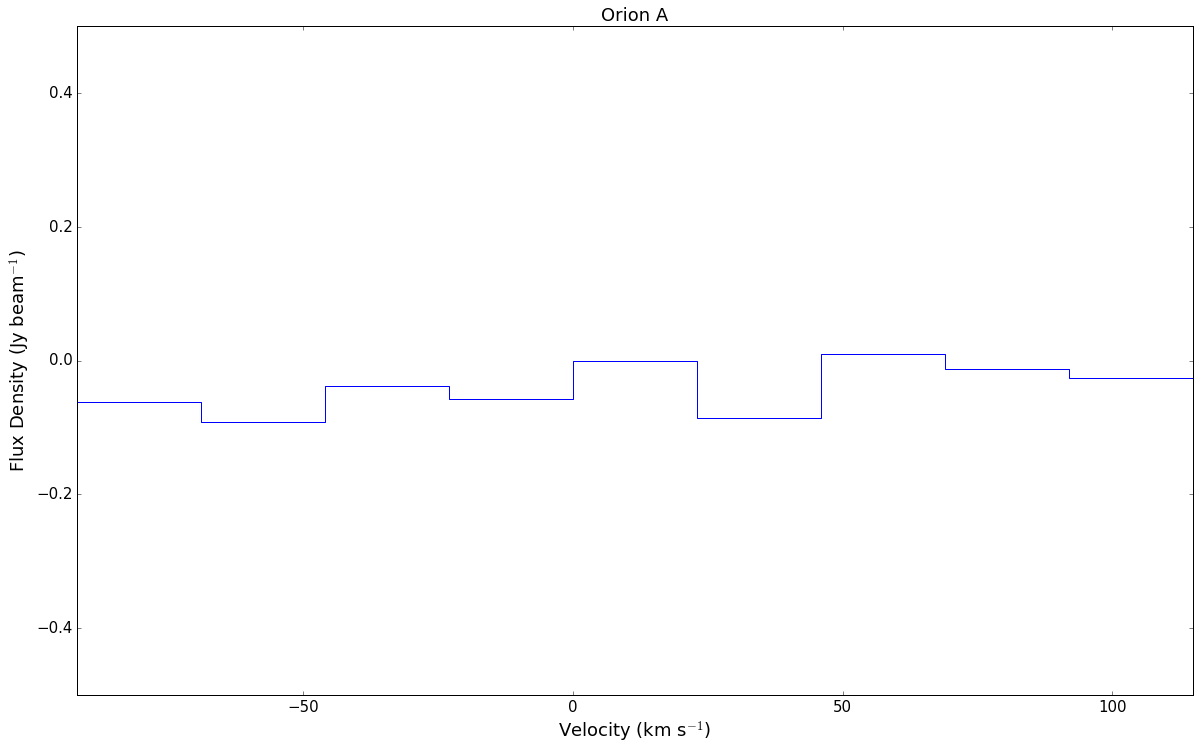

In [126]:
import matplotlib
from matplotlib import pyplot as plt
import sys
import csv
from operator import itemgetter, attrgetter, methodcaller
%matplotlib inline
bigfig=plt.figure(figsize=(20,12))
ax1=bigfig.add_subplot(111)
ax1.step(vel,signal,color='blue')
ax1.set_title("Orion A",fontsize=18)
ax1.set_xlabel("Velocity (km s$^{-1}$)",fontsize=18)
ax1.set_xlim(-92,115)
ax1.set_ylim(-0.5,0.5)
ax1.set_ylabel("Flux Density (Jy beam$^{-1}$)",fontsize=18)
ax1.tick_params(labelsize=15)
      
#bigfig.savefig("Orion_A_Stacked_Spectra.png")

In [127]:
optical=np.divide(signal,850)

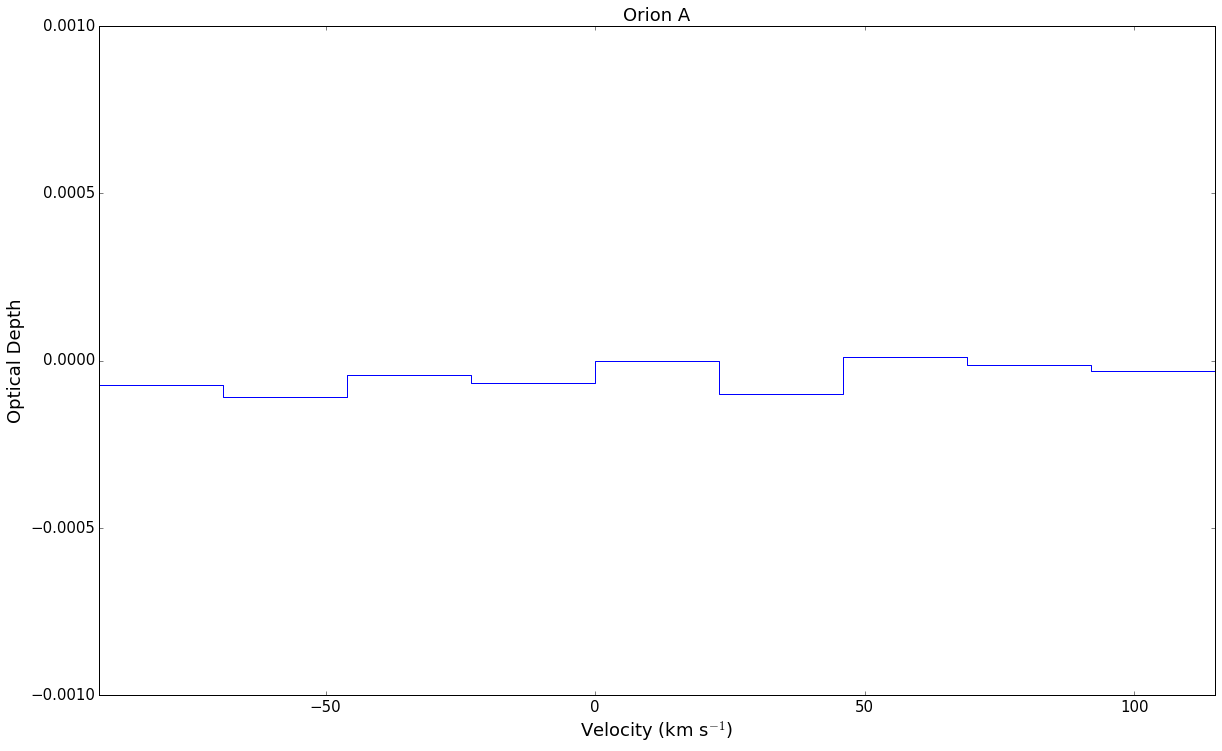

In [128]:
import matplotlib
from matplotlib import pyplot as plt
import sys
import csv
from operator import itemgetter, attrgetter, methodcaller
%matplotlib inline
bigfig=plt.figure(figsize=(20,12))
ax1=bigfig.add_subplot(111)
ax1.step(vel,optical,color='blue')
ax1.set_title("Orion A",fontsize=18)
ax1.set_xlabel("Velocity (km s$^{-1}$)",fontsize=18)
ax1.set_xlim(-92,115)
ax1.set_ylim(-0.001,0.001)
ax1.set_ylabel("Optical Depth",fontsize=18)
ax1.tick_params(labelsize=15)
      
#bigfig.savefig("Orion_A_Stacked_Spectra_optical.png")

In [77]:
subcube = fits.open('Recombination_Stacked/Orion_RRL_Stacked.fits')
data = subcube[0].data
header = subcube[0].header

# we can just delete the stokes axis
rm_cube = data[0:100,:,:]
rm_cube.shape

#replace all the zeros with nans before doing statistical calculations
rm_cube[rm_cube==0] = np.nan
rm_cube.shape
rm_cube = data[0:100,:,:]
rm_cube[rm_cube==0] = np.nan
rm_cube.shape


rms_cube=np.nanstd(rm_cube, axis=1)
rms_cube.shape


#snr=rm_cube/rms_cube

#save the signal to noise cube to a fits file
#datacube[0].data = np.float32(snr)
#datacube.writeto('Median_snr.fits', clobber=True)
datacube[0].data=np.float32(rms_cube)
datacube.writeto('Median_rms.fits', clobber=True)